In [2]:
import matplotlib.pyplot as plt
import numpy as np


In [45]:
# network size N
N = 5000

# number of edges
M = N*30

## initialize time
T = 0
## choose Tmax
Tmax = 1000


In [113]:
def find_extinction_time(b, E):

    ## find the number of events that occur in the interval from T = 0 to T = Tmax
    n = np.random.poisson(lam = Tmax*(N+b*M))

    ## find times for all events
    times = np.sort(np.random.uniform(0, Tmax, n))

    ## start out with all infectious individuals
    X = np.ones(N, dtype = int)

    ## initialize number infected (all infected)
    I = N

    ## initialize list of infected people for all timesteps
    infected = np.zeros(n)

    # run simulation
    for t in range(n):

        if np.random.random() < N/(N + b*M):

            i = np.random.randint(N)

            I -= X[i]

            X[i] = 0

        else:

            i,j = E[np.random.randint(M)]

            I += X[i] ^ X[j]

            X[i] = X[j] = (X[i] or X[j])
    
        infected[t] = I

        ## if zero infected people, break simulation, truncate infected array
        if I == 0:

            infected = infected[:t]

            break

    ## return extinction time, if there is no extinction time, the time returned will be Tmax
    return times[len(infected)- 1]

def extinction_time_simulation(b_array, E):

    extinction_times = np.zeros(len(b_array))

    for i, b in zip(np.arange(0, len(b_array), dtype = int), b_array):

        extinction = 0

        if round(find_extinction_time(b, E)) == Tmax:
            
            extinction_times[i] = Tmax
        
        else:
        
            for t in range(20):

                extinction += find_extinction_time(b, E)

            extinction_times[i] = extinction / 20
        
        print(extinction_times[i])
    
    return extinction_times


In [9]:
b_array = np.linspace(0, 0.018, 20)

## random edge matrix
E = np.random.randint(0,N,size=2*M).reshape((N*30, 2))

uniform_extinction_times = extinction_time_simulation(b_array, E)
print(uniform_extinction_times)


9.44186830556052
9.35686550319885
9.62343219741253
10.779477960110986
10.677475927927931
11.622117702124815
12.87429114912391
12.822961054178506
13.80463983386528
15.96204042834836
18.006763321488485
19.5829594458028
22.038786004647072
25.524179762824016
28.07121729175922
34.570718860522476
49.80285565554113
77.69063026232251
305.6702342282098
1000.0
[   9.44186831    9.3568655     9.6234322    10.77947796   10.67747593
   11.6221177    12.87429115   12.82296105   13.80463983   15.96204043
   18.00676332   19.58295945   22.038786     25.52417976   28.07121729
   34.57071886   49.80285566   77.69063026  305.67023423 1000.        ]


In [121]:
uniform_extinction_times = [9.44186831, 9.3568655, 9.6234322, 10.77947796, 10.67747593,
   11.6221177, 12.87429115, 12.82296105, 13.80463983, 15.96204043,
   18.00676332,   19.58295945,   22.038786,     25.52417976,   28.07121729,
   34.57071886,   49.80285566,   77.69063026,  305.67023423, 1000       ]

## predicted by model:
model = []
model_b = np.linspace(0, 0.0173, 1000)
for b in model_b:
    estimate = (np.log(N) + 1) / (1-(2*M*b/N))
    model.append(estimate)


c:\Users\sharm\anaconda3\envs\iibproject\lib\site-packages\ipykernel_launcher.py:3: RuntimeWarning: invalid value encountered in log10
  This is separate from the ipykernel package so we can avoid doing imports until


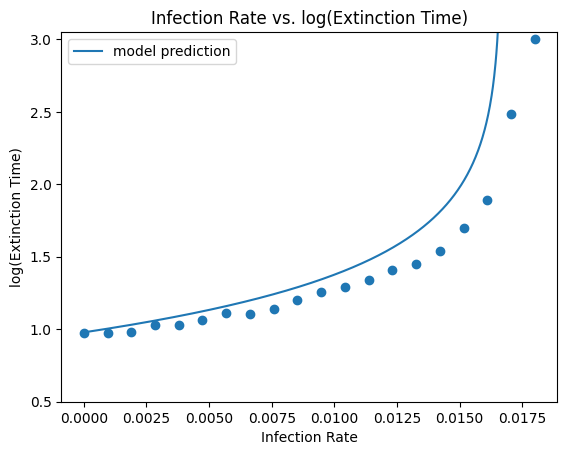

In [122]:
import matplotlib.pyplot as plt
plt.scatter(b_array, np.log10(uniform_extinction_times))
plt.plot(model_b, np.log10(model), label = 'model prediction')
# plt.errorbar(b_array, np.log10(uniform_extinction_times), y_error)
plt.legend()
plt.ylim(0.5, 3.05)
plt.title('Infection Rate vs. log(Extinction Time)')
plt.ylabel('log(Extinction Time)')
plt.xlabel('Infection Rate')
plt.show()
